In [141]:
import datasets
from datasets import list_datasets, load_dataset
from pprint import pprint
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download the dataset from Hugging face

In [142]:
squad_dataset = load_dataset('squad')

Reusing dataset squad (C:\Users\palla\.cache\huggingface\datasets\squad\plain_text\1.0.0\d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453)


  0%|          | 0/2 [00:00<?, ?it/s]

# Exploring the SQuAD dataset

To get the overview of the dataset:

In [143]:
print(squad_dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})


Squad dataset has train dataset with 87,588 samples and validation dataset with 10,570 samples. Train/test Split is ~ 9:1. Now, lets load the training and test datasets.

In [144]:
squad_train = load_dataset('squad', split='train')
squad_valid = load_dataset('squad', split='validation')

Reusing dataset squad (C:\Users\palla\.cache\huggingface\datasets\squad\plain_text\1.0.0\d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453)
Reusing dataset squad (C:\Users\palla\.cache\huggingface\datasets\squad\plain_text\1.0.0\d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453)


Looking at the description of this dataset, to know where it comes from:

In [145]:
print(squad_train.info.description)

Stanford Question Answering Dataset (SQuAD) is a reading comprehension dataset, consisting of questions posed by crowdworkers on a set of Wikipedia articles, where the answer to every question is a segment of text, or span, from the corresponding reading passage, or the question might be unanswerable.



Start by looking at features present in the training dataset:

In [146]:
pprint(squad_train.features)

{'answers': Sequence(feature={'text': Value(dtype='string', id=None), 'answer_start': Value(dtype='int32', id=None)}, length=-1, id=None),
 'context': Value(dtype='string', id=None),
 'id': Value(dtype='string', id=None),
 'question': Value(dtype='string', id=None),
 'title': Value(dtype='string', id=None)}


There are five columns: answers, context, id, question and title. Answer has the text of the answer and the index where 
answer starts. Now, lets look at the first sample:

In [147]:
print("First example from the dataset: \n")
pprint(squad_train[0])

First example from the dataset: 

{'answers': {'answer_start': [515], 'text': ['Saint Bernadette Soubirous']},
 'context': 'Architecturally, the school has a Catholic character. Atop the '
            "Main Building's gold dome is a golden statue of the Virgin Mary. "
            'Immediately in front of the Main Building and facing it, is a '
            'copper statue of Christ with arms upraised with the legend '
            '"Venite Ad Me Omnes". Next to the Main Building is the Basilica '
            'of the Sacred Heart. Immediately behind the basilica is the '
            'Grotto, a Marian place of prayer and reflection. It is a replica '
            'of the grotto at Lourdes, France where the Virgin Mary reputedly '
            'appeared to Saint Bernadette Soubirous in 1858. At the end of the '
            'main drive (and in a direct line that connects through 3 statues '
            'and the Gold Dome), is a simple, modern stone statue of Mary.',
 'id': '5733be284776f4190066

This sample is about University of Notre Dame. Lets explore what other titles are there in this dataset:

In [148]:
pprint(squad_train['title'][:5])

['University_of_Notre_Dame',
 'University_of_Notre_Dame',
 'University_of_Notre_Dame',
 'University_of_Notre_Dame',
 'University_of_Notre_Dame']


In [149]:
pprint(squad_train['title'][1000:1010])

['Beyoncé',
 'Beyoncé',
 'Beyoncé',
 'Beyoncé',
 'Beyoncé',
 'Beyoncé',
 'Beyoncé',
 'Beyoncé',
 'Beyoncé',
 'Beyoncé']


Now, I will look at some examples of question:

In [150]:
pprint(squad_train['question'][:5])

['To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?',
 'What is in front of the Notre Dame Main Building?',
 'The Basilica of the Sacred heart at Notre Dame is beside to which structure?',
 'What is the Grotto at Notre Dame?',
 'What sits on top of the Main Building at Notre Dame?']


In [20]:
pprint(squad_train['question'][2000:2010])

["Who accompanied Chopin's sister to Paris?",
 'Who gave Chopin a loan in September for an apartment?',
 "What did Parisian ladies consider proper etiquette when in Chopin's room?",
 'Why did Chopin request being cut open after his death?',
 'What did Chopin reply to the doctor when asked is he was suffering?',
 "Who made Chopin's death mask?",
 'Why did Chopin want his body opened when he died?',
 "What did Solange's husband make hours after Chopin's death along with his "
 'death mask?',
 "What is listed as Chopin's official cause of death?",
 "What was the name of Chopin's doctor?"]


# Converting into Panda's dataframe

I will convert dataset to Panda's dataframe, so I can plot some features to get a better understadning of this dataset. Before that I will drop the column, context, as it has a lot of text. In Huggingface Datasets naturally frees the user from RAM limitation, all datasets are memory-mapped using an efficient zero-serialization cost backend (Apache Arrow). But, in Pandas, it is going to load into memory. I will remove context column to make it light weight, so it is easier to do analysis.

In [151]:
squad_train = squad_train.remove_columns("context")

In [152]:
df = pd.DataFrame(squad_train)

# Shape and Missing values:

In [153]:
df.shape

(87599, 4)

In [154]:
df.isnull().sum()

id          0
title       0
question    0
answers     0
dtype: int64

In [155]:
df.head()

,id,title,question,answers
0,5733be284776f41900661182,University_of_Notre_Dame,To whom did the Virgin Mary allegedly appear i...,"{'text': ['Saint Bernadette Soubirous'], 'answ..."
1,5733be284776f4190066117f,University_of_Notre_Dame,What is in front of the Notre Dame Main Building?,"{'text': ['a copper statue of Christ'], 'answe..."
2,5733be284776f41900661180,University_of_Notre_Dame,The Basilica of the Sacred heart at Notre Dame...,"{'text': ['the Main Building'], 'answer_start'..."
3,5733be284776f41900661181,University_of_Notre_Dame,What is the Grotto at Notre Dame?,{'text': ['a Marian place of prayer and reflec...
4,5733be284776f4190066117e,University_of_Notre_Dame,What sits on top of the Main Building at Notre...,{'text': ['a golden statue of the Virgin Mary'...


There are 87,599 rows, 4 columns and no missing values in this dataset.

# Exploring Titles

Plotting the title counts, to visulaize what titles we have and their counts:

In [156]:
px.bar(df["title"].value_counts().reset_index(), x="index", y="title", labels={"index": "Titles", "title": "Count"})

In [157]:
df["title"].value_counts()

New_York_City            817
American_Idol            802
Beyoncé                  758
Frédéric_Chopin          697
Queen_Victoria           680
                        ... 
Great_Plains              47
Tristan_da_Cunha          44
Pitch_(music)             36
Matter                    24
Myocardial_infarction     22
Name: title, Length: 442, dtype: int64

New York City is the most common title in this dataset. It looks like there are very wide variety in this dataset. It 
include places, persons, events, music etc. This looks like a good general purpose dataset to train a model when we are
not sure what kind of questions we will be asking for prediction.

# Exploring Questions

In [158]:
df["question"].value_counts()

Which Caribbean nation is in the top quartile of HDI (but missing IHDI)?                                     6
I couldn't could up with another question. But i need to fill this space because I can't submit the hit.     6
Who won this season of Idol?                                                                                 6
Who was a pop idol that started on American Idol?                                                            5
dd                                                                                                           4
                                                                                                            ..
Who did the Gelug exchange gifts with?                                                                       1
What do critics note were intermingled at the time the Constitution was ratified?                            1
What singer inspired Beyoncé's B'Day album?                                                                  1
W

It looks like that questions are repeated many times. This is a good thing, as we can traing model on numerous
type of questions.

Now, I want to know, How questions are frames in this dataset. I will ceate a separate column with question_type. usually,
the questions have what, who, when, where, which, why and how. I want to know what is most used in this dataset. This will
help me in framing the questions in future, when I will use this dataset for my project. If I frame the questions in similar
manner as in the dataset that my model is trained on, then I will get better results.

I have clean up the text in question column a little bit like removing white spaces and converting them to lower case 
for uniformity.

In [159]:
df["question"] = df["question"].str.strip()
df["question"] = df["question"].str.lower()

In [160]:
df['question_type'] = pd.np.where(df["question"].str.contains("who"),"who",
                      pd.np.where(df["question"].str.contains("what"), "what",
                      pd.np.where(df["question"].str.contains("when"), "when",
                      pd.np.where(df["question"].str.contains("where"), "where", 
                      pd.np.where(df["question"].str.contains("which"), "which", 
                      pd.np.where(df["question"].str.contains("why"), "why",
                      pd.np.where(df["question"].str.contains("how"), "how",
                                  "others")))))))

C:\Users\palla\Anaconda3\envs\tfp3.6\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\palla\Anaconda3\envs\tfp3.6\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\palla\Anaconda3\envs\tfp3.6\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\palla\Anaconda3\envs\tfp3.6\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\palla\Anaconda3\envs\tfp3.6\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

The pandas.np module is deprecated and will 

In [161]:
df.head()

,id,title,question,answers,question_type
0,5733be284776f41900661182,University_of_Notre_Dame,to whom did the virgin mary allegedly appear i...,"{'text': ['Saint Bernadette Soubirous'], 'answ...",who
1,5733be284776f4190066117f,University_of_Notre_Dame,what is in front of the notre dame main building?,"{'text': ['a copper statue of Christ'], 'answe...",what
2,5733be284776f41900661180,University_of_Notre_Dame,the basilica of the sacred heart at notre dame...,"{'text': ['the Main Building'], 'answer_start'...",which
3,5733be284776f41900661181,University_of_Notre_Dame,what is the grotto at notre dame?,{'text': ['a Marian place of prayer and reflec...,what
4,5733be284776f4190066117e,University_of_Notre_Dame,what sits on top of the main building at notre...,{'text': ['a golden statue of the Virgin Mary'...,what


In [162]:
df["question_type"].value_counts()

what      50438
who        9904
how        9175
which      5961
when       5720
where      3657
others     1537
why        1207
Name: question_type, dtype: int64

In [163]:
px.bar(df["question_type"].value_counts().reset_index(), x="index", y="question_type", labels={"index": "Question_type", "question_type": "Count"})

It looks like most of the questions contain "what", followed by "who" and "how". this will work for my use case. As most importantly, I would like to know, what customer has done or said. After that I would be interested in how much money they want to invest and then which portfolio will be better for them.

Lets look at the others in question, what kind os questions they have:

In [164]:
df_oth = df.loc[df["question_type"] == "others"]

In [165]:
df_oth.head(20)

,id,title,question,answers,question_type
504,56bf9dbda10cfb14005511c5,Beyoncé,hoe did everyone learn that beyonce performed ...,"{'text': ['documents obtained by WikiLeaks'], ...",others
751,56bfbf2fa10cfb14005512a2,Beyoncé,hoe does she describe oprah winfrey?,"{'text': ['a strong woman'], 'answer_start': [...",others
760,56bec29b3aeaaa14008c9380,Beyoncé,beyonce had singers in the background known by...,"{'text': ['The Mamas'], 'answer_start': [216]}",others
967,56bed32f3aeaaa14008c94d0,Beyoncé,beyonce's grandma's name was?,"{'text': ['Agnèz Deréon'], 'answer_start': [218]}",others
1106,57341cf4d058e614000b6966,Montana,does montana have a sales tax?,"{'text': ['no'], 'answer_start': [113]}",others
1383,57328a33b3a91d1900202e2a,Antibiotics,name some adverse effects?,{'text': ['fever and nausea to major allergic ...,others
1384,57328a33b3a91d1900202e2b,Antibiotics,name some side-effects?,"{'text': ['diarrhea'], 'answer_start': [803]}",others
1390,57301bfca23a5019007fcd84,Antibiotics,do antibiotics cause obesity in humans?,"{'text': ['unclear'], 'answer_start': [858]}",others
1394,57328cf2b3a91d1900202e35,Antibiotics,do antibiotics increase the chance of getting ...,"{'text': ['unclear'], 'answer_start': [858]}",others
1395,57302106a23a5019007fcdf7,Antibiotics,do antibiotics interact with birth control pills?,{'text': ['The majority of studies indicate an...,others


They are with do or is. This is also helpful to know how I can ask questions to my model.

# Questions about Finance

I want to know if there is any question about Finance in this dataset. I will look for key words like bank, account, balance, investment, stock etc. I will make another column, if question has any of these key word, that row will be marked 1 otherwise 0.

In [166]:
df['is_financial'] = pd.np.where(df["question"].str.contains("bank"), 1,
                   pd.np.where(df["question"].str.contains("account"), 1,
                   pd.np.where(df["question"].str.contains("investment"), 1,
                   pd.np.where(df["question"].str.contains("interest"), 1, 
                   pd.np.where(df["question"].str.contains("balance"), 1, 
                   pd.np.where(df["question"].str.contains("stock"), 1, 0))))))

C:\Users\palla\Anaconda3\envs\tfp3.6\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\palla\Anaconda3\envs\tfp3.6\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\palla\Anaconda3\envs\tfp3.6\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\palla\Anaconda3\envs\tfp3.6\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\palla\Anaconda3\envs\tfp3.6\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

The pandas.np module is deprecated and will 

In [167]:
df_fin = df.loc[df["is_financial"] == 1]

In [168]:
df_fin.shape

(626, 6)

There are only 626 samples. Let see what are these questions:

In [169]:
df_fin.head()

,id,title,question,answers,question_type,is_financial
1135,573422e44776f41900661929,Montana,hispanics account for what percentage of monat...,"{'text': ['2.9'], 'answer_start': [153]}",what,1
1306,57340f5bd058e614000b68ce,Genocide,"what was taken into account, without mentionin...","{'text': ['the Commission report'], 'answer_st...",what,1
1351,5730ba2f396df919000962ee,Antibiotics,what does there medicines do for livestock?,"{'text': ['develop resistance'], 'answer_start...",what,1
1357,5731bbe8e17f3d1400422342,Antibiotics,what happened when antibiotics was over used i...,"{'text': ['develop resistance'], 'answer_start...",what,1
1770,56cbfcda6d243a140015ee41,Frédéric_Chopin,what are the three names stated in frédéric's ...,"{'text': ['Herz, Liszt, Hiller'], 'answer_star...",what,1


This is not what I was looking for. Word "account" here is not refering to the bank's account. So, I can use this dataset to pretrain the model but then I will have to create another similar dataset with my examples and fine tune the model on my datset to get better accuracy.

# Word Count

I want to know, what kind of words are there in questions and answers (most common ones). To do a sanity check, if this dataset is not totally off base for my purpose.

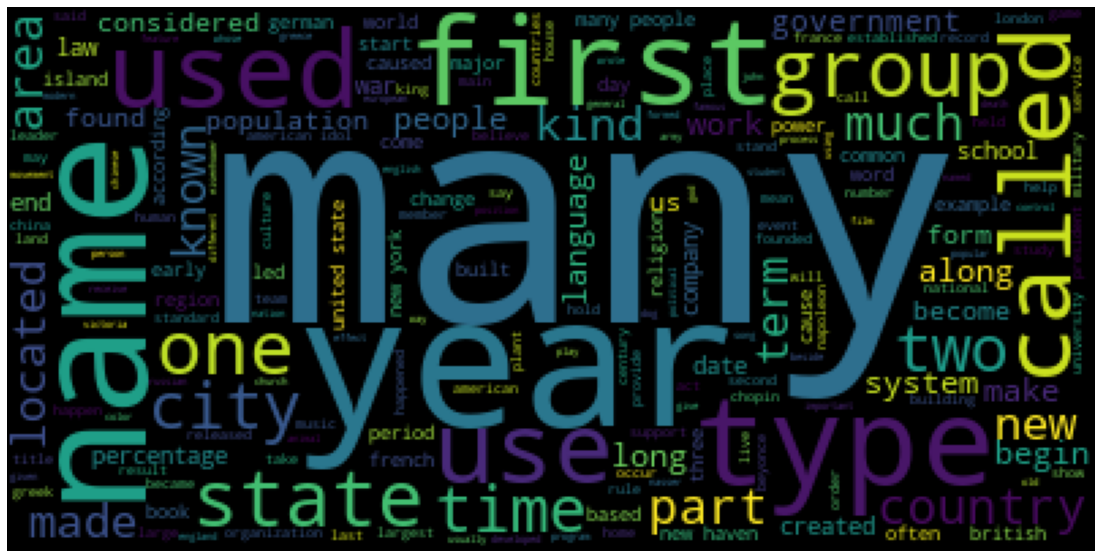

In [170]:
# For question:
text = " ".join(df['question'])
wordcloud = WordCloud().generate(text)
# Generate plot
plt.rcParams["figure.figsize"] = (100,10)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Nothing alarming here. these are very common words. I will be most likely using them.

Lets look at answers now. 

In [171]:
df.head()

,id,title,question,answers,question_type,is_financial
0,5733be284776f41900661182,University_of_Notre_Dame,to whom did the virgin mary allegedly appear i...,"{'text': ['Saint Bernadette Soubirous'], 'answ...",who,0
1,5733be284776f4190066117f,University_of_Notre_Dame,what is in front of the notre dame main building?,"{'text': ['a copper statue of Christ'], 'answe...",what,0
2,5733be284776f41900661180,University_of_Notre_Dame,the basilica of the sacred heart at notre dame...,"{'text': ['the Main Building'], 'answer_start'...",which,0
3,5733be284776f41900661181,University_of_Notre_Dame,what is the grotto at notre dame?,{'text': ['a Marian place of prayer and reflec...,what,0
4,5733be284776f4190066117e,University_of_Notre_Dame,what sits on top of the main building at notre...,{'text': ['a golden statue of the Virgin Mary'...,what,0


But, here I have to do a little bit cleaning. As answers column is in the form of dictionary. I will use json_normalize function to convert them into 

In [172]:
df = df.join(pd.json_normalize(df.pop('answers')))

In [173]:
df['answer_text'] = [','.join(map(str, l)) for l in df['text']]

In [174]:
df.head()

,id,title,question,question_type,is_financial,text,answer_start,answer_text
0,5733be284776f41900661182,University_of_Notre_Dame,to whom did the virgin mary allegedly appear i...,who,0,[Saint Bernadette Soubirous],[515],Saint Bernadette Soubirous
1,5733be284776f4190066117f,University_of_Notre_Dame,what is in front of the notre dame main building?,what,0,[a copper statue of Christ],[188],a copper statue of Christ
2,5733be284776f41900661180,University_of_Notre_Dame,the basilica of the sacred heart at notre dame...,which,0,[the Main Building],[279],the Main Building
3,5733be284776f41900661181,University_of_Notre_Dame,what is the grotto at notre dame?,what,0,[a Marian place of prayer and reflection],[381],a Marian place of prayer and reflection
4,5733be284776f4190066117e,University_of_Notre_Dame,what sits on top of the main building at notre...,what,0,[a golden statue of the Virgin Mary],[92],a golden statue of the Virgin Mary


It looks beter now. lets do a word count on answer_text now:

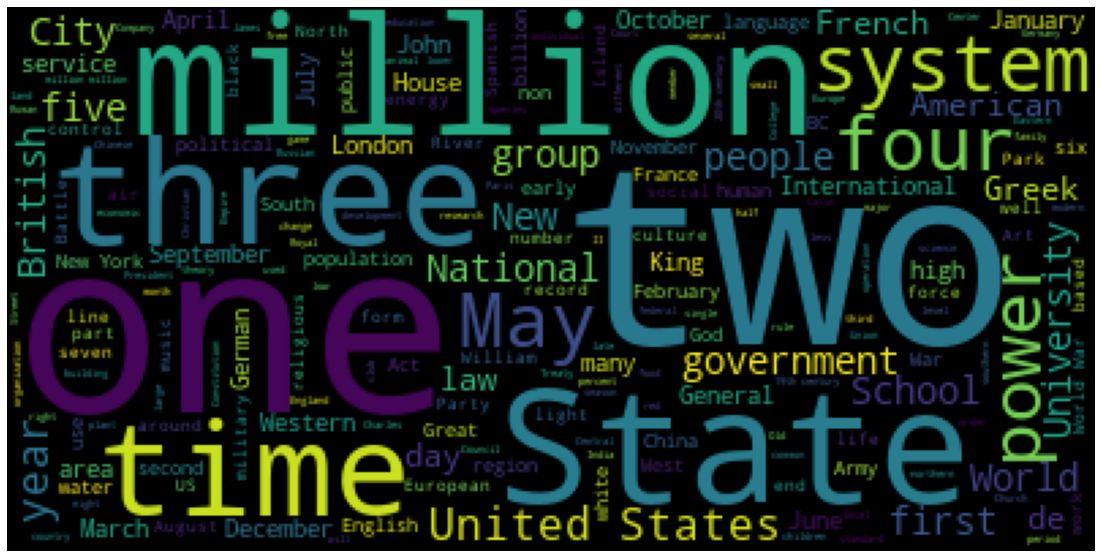

In [175]:
text = " ".join(df['answer_text'])
wordcloud = WordCloud().generate(text)
# Generate plot
plt.rcParams["figure.figsize"] = (100,10)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Conclusion

SQuAD is a great dataset for training a model for Question and Answering. It has questions/answers from a wide variety of topics. There are no missing values. It is developed by Stanford, which is one of the top university. For my use case (in Financial sector), there are not many examples. I will use Squad dataset to train a base language model and then fine-tuned it on my specific dataset.